In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [87]:
data = pd.read_csv('AAPL.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10959,2024-06-04,194.639999,195.320007,193.029999,194.350006,194.350006,47471400
10960,2024-06-05,195.399994,196.899994,194.869995,195.869995,195.869995,54156800
10961,2024-06-06,195.690002,196.500000,194.169998,194.479996,194.479996,41181800
10962,2024-06-07,194.649994,196.940002,194.139999,196.889999,196.889999,53103900


In [88]:
data = data[['Date', 'Close']]
data

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10959,2024-06-04,194.350006
10960,2024-06-05,195.869995
10961,2024-06-06,194.479996
10962,2024-06-07,196.889999


In [89]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

<ipython-input-90-eef3cfff9d19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


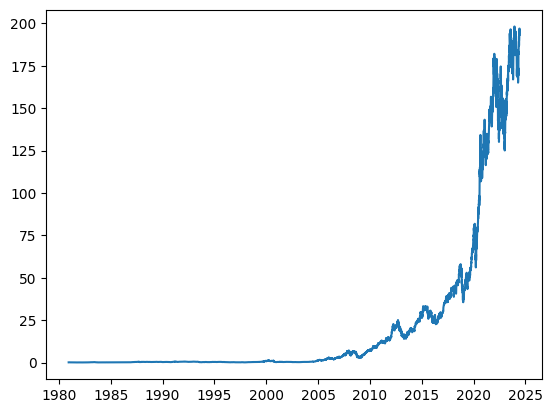

In [90]:
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'], data['Close'])

In [91]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
  df = dc(df)
  df['Date'] = pd.to_datetime(df['Date'])

  df.set_index('Date', inplace=True)

  for i in range(1, n_steps+1):
    df[f'Close(t-{i})'] = df['Close'].shift(i)

  df.dropna(inplace=True)

  return df

lookback = 30
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),...,Close(t-21),Close(t-22),Close(t-23),Close(t-24),Close(t-25),Close(t-26),Close(t-27),Close(t-28),Close(t-29),Close(t-30)
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-27,0.142857,0.143973,0.146205,0.146763,0.145089,0.142299,0.146763,0.138393,0.139509,0.136719,...,0.158482,0.145089,0.137835,0.132254,0.126116,0.118862,0.115513,0.112723,0.121652,0.128348
1981-01-28,0.138393,0.142857,0.143973,0.146205,0.146763,0.145089,0.142299,0.146763,0.138393,0.139509,...,0.160714,0.158482,0.145089,0.137835,0.132254,0.126116,0.118862,0.115513,0.112723,0.121652
1981-01-29,0.133371,0.138393,0.142857,0.143973,0.146205,0.146763,0.145089,0.142299,0.146763,0.138393,...,0.156808,0.160714,0.158482,0.145089,0.137835,0.132254,0.126116,0.118862,0.115513,0.112723
1981-01-30,0.126116,0.133371,0.138393,0.142857,0.143973,0.146205,0.146763,0.145089,0.142299,0.146763,...,0.152344,0.156808,0.160714,0.158482,0.145089,0.137835,0.132254,0.126116,0.118862,0.115513
1981-02-02,0.118862,0.126116,0.133371,0.138393,0.142857,0.143973,0.146205,0.146763,0.145089,0.142299,...,0.154018,0.152344,0.156808,0.160714,0.158482,0.145089,0.137835,0.132254,0.126116,0.118862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-04,194.350006,194.029999,192.250000,191.289993,190.289993,189.990005,189.979996,186.880005,190.899994,192.350006,...,183.380005,173.029999,169.300003,170.330002,173.500000,169.300003,169.889999,169.020004,166.899994,165.839996
2024-06-05,195.869995,194.350006,194.029999,192.250000,191.289993,190.289993,189.990005,189.979996,186.880005,190.899994,...,181.710007,183.380005,173.029999,169.300003,170.330002,173.500000,169.300003,169.889999,169.020004,166.899994
2024-06-06,194.479996,195.869995,194.350006,194.029999,192.250000,191.289993,190.289993,189.990005,189.979996,186.880005,...,182.399994,181.710007,183.380005,173.029999,169.300003,170.330002,173.500000,169.300003,169.889999,169.020004


In [92]:
shifted_df_np = shifted_df.to_numpy()
shifted_df_np

array([[1.42857000e-01, 1.43973000e-01, 1.46205000e-01, ...,
        1.12723000e-01, 1.21652000e-01, 1.28348000e-01],
       [1.38393000e-01, 1.42857000e-01, 1.43973000e-01, ...,
        1.15513000e-01, 1.12723000e-01, 1.21652000e-01],
       [1.33371000e-01, 1.38393000e-01, 1.42857000e-01, ...,
        1.18862000e-01, 1.15513000e-01, 1.12723000e-01],
       ...,
       [1.94479996e+02, 1.95869995e+02, 1.94350006e+02, ...,
        1.69300003e+02, 1.69889999e+02, 1.69020004e+02],
       [1.96889999e+02, 1.94479996e+02, 1.95869995e+02, ...,
        1.73500000e+02, 1.69300003e+02, 1.69889999e+02],
       [1.93119995e+02, 1.96889999e+02, 1.94479996e+02, ...,
        1.70330002e+02, 1.73500000e+02, 1.69300003e+02]])

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_np = scaler.fit_transform(shifted_df_np)
shifted_df_np

array([[-0.99905332, -0.99904205, -0.99901951, ..., -0.99935761,
        -0.99926745, -0.99919983],
       [-0.9990984 , -0.99905332, -0.99904205, ..., -0.99932944,
        -0.99935761, -0.99926745],
       [-0.99914911, -0.9990984 , -0.99905332, ..., -0.99929562,
        -0.99932944, -0.99935761],
       ...,
       [ 0.96334456,  0.97738063,  0.96203193, ...,  0.70907939,
         0.71503711,  0.70625199],
       [ 0.98768054,  0.96334456,  0.97738063, ...,  0.75149056,
         0.70907939,  0.71503711],
       [ 0.9496114 ,  0.98768054,  0.96334456, ...,  0.71948022,
         0.75149056,  0.70907939]])

In [94]:
X = shifted_df_np[:, 1:]
y = shifted_df_np[:, 0]

X.shape, y.shape

((10934, 30), (10934,))

In [95]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99919983, -0.99926745, -0.99935761, ..., -0.99901388,
        -0.99901951, -0.99904205],
       [-0.99926745, -0.99935761, -0.99932944, ..., -0.99901951,
        -0.99904205, -0.99905332],
       [-0.99935761, -0.99932944, -0.99929562, ..., -0.99904205,
        -0.99905332, -0.9990984 ],
       ...,
       [ 0.70625199,  0.71503711,  0.70907939, ...,  0.95880053,
         0.96203193,  0.97738063],
       [ 0.71503711,  0.70907939,  0.75149056, ...,  0.96203193,
         0.97738063,  0.96334456],
       [ 0.70907939,  0.75149056,  0.71948022, ...,  0.97738063,
         0.96334456,  0.98768054]])

In [96]:
X_train = X[:int(len(X)*0.8)]
X_test = X[int(len(X)*0.8):]

y_train = y[:int(len(y)*0.8)]
y_test = y[int(len(y)*0.8):]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8747, 30), (2187, 30), (8747,), (2187,))

In [97]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8747, 30, 1), (2187, 30, 1), (8747, 1), (2187, 1))

In [98]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([8747, 30, 1]),
 torch.Size([2187, 30, 1]),
 torch.Size([8747, 1]),
 torch.Size([2187, 1]))

In [99]:
from torch.utils.data import Dataset, DataLoader

class StockPriceDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, i):
    return self.X[i], self.y[i]

train_dataset = StockPriceDataset(X_train, y_train)
test_dataset = StockPriceDataset(X_test, y_test)

In [100]:
batch_size = 20
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [101]:
for _, batch in enumerate(train_loader):
  x_batch, y_batch = batch[0].to(device), batch[1].to(device)
  print(x_batch.shape, y_batch.shape)
  break

torch.Size([20, 30, 1]) torch.Size([20, 1])


In [102]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_stacked_layers):
    super().__init__()
    self.hidden_size = hidden_size
    self.num_stacked_layers = num_stacked_layers
    self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, x):
    batch_size = x.size(0)
    h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
    c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
    out, _ = self.lstm(x, (h0, c0))
    out = self.fc(out[:, -1, :])
    return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [103]:
def train_one_epoch():
  model.train(True)
  print(f'Epoch: {epoch+1}')
  running_loss = 0.0

  for batch_index, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    output = model(x_batch)
    loss = loss_function(output, y_batch)
    running_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_index % 100 == 99:
      avg_loss_across_batches = running_loss / 100
      print(f'Batch {0}, Loss: {1:.3f}'.format(batch_index+1, avg_loss_across_batches))
      running_loss = 0.0

  print()

In [104]:
def validate_one_epoch():
  model.train(False)
  running_loss = 0.0

  for batch_index, batch in enumerate(test_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    with torch.no_grad():
      output = model(x_batch)
      loss = loss_function(output, y_batch)
      running_loss += loss.item()

  avg_loss_across_batches = running_loss / len(test_loader)

  print('Val loss: {0:.3f}'.format(avg_loss_across_batches))
  print('***************************************************')
  print()

In [105]:
learning_rate = 0.01
num_epochs = 50
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
  train_one_epoch()
  validate_one_epoch()

Epoch: 1
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000

Val loss: 0.361
***************************************************

Epoch: 2
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000

Val loss: 0.370
***************************************************

Epoch: 3
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000

Val loss: 0.356
***************************************************

Epoch: 4
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000

Val loss: 0.347
***************************************************

Epoch: 5
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000

Val loss: 0.334
***************************************************

Epoch: 6
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000
Batch 0, Loss: 1.000

Val loss: 0.327
***************************************************

Epoch: 7
Batch 0, Loss

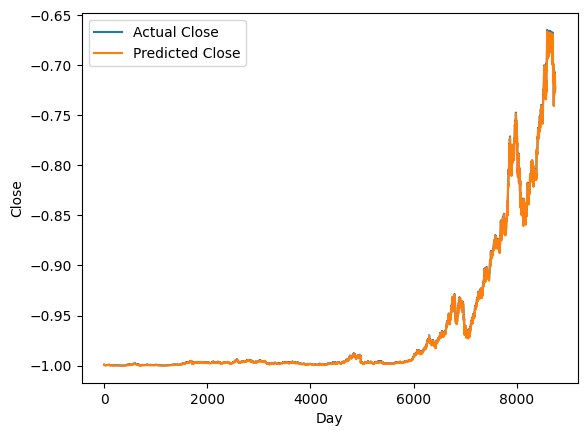

In [106]:
with torch.no_grad():
  predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [107]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([ 0.11345206,  0.11300936,  0.10770875, ..., 28.54175417,
       27.92034419, 27.09705094])

In [108]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([ 0.14285918,  0.13839086,  0.13337358, ..., 28.11000303,
       27.26499974, 27.57500231])

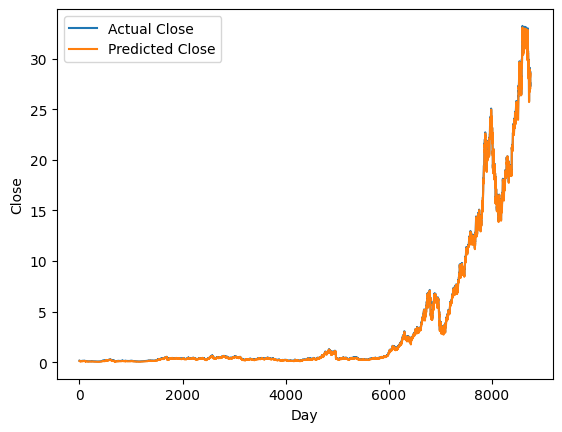

In [109]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [110]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([ 27.53445094,  27.2291587 ,  27.53047254, ..., 142.9454988 ,
       143.02527345, 143.20434289])

In [111]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([ 27.39500025,  27.59500057,  27.69499778, ..., 194.47999778,
       196.89000079, 193.11999793])

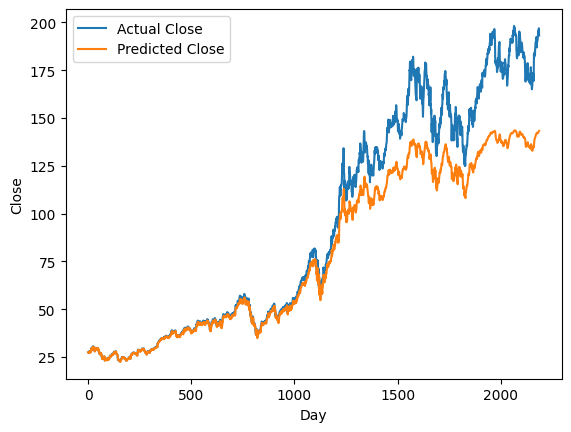

In [112]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()